In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('cleaned_headlines.csv')

# HTML Tags already removed when extracting the text in the Scraping part

In [ ]:
df.head()

,url,news,headline
0,https://www.foxnews.com/lifestyle/jack-carrs-e...,Fox News,Jack Carr recalls Eisenhower's D-Day memo abou...
1,https://www.foxnews.com/entertainment/bruce-wi...,Fox News,"Bruce Willis, Demi Moore avoided doing one thi..."
2,https://www.foxnews.com/politics/blinken-meets...,Fox News,"Blinken meets Qatar PM, says Israeli actions a..."
3,https://www.foxnews.com/entertainment/emily-bl...,Fox News,Emily Blunt says her ‘toes curl’ when people t...
4,https://www.foxnews.com/media/the-view-co-host...,Fox News,"'The View' co-host, CNN commentator Ana Navarr..."


# Remove Stopwords

In [ ]:
# Remove stopwords from the reviews
# From NLTK
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Get the list of English stopwords
stopwords = stopwords.words('english')
# stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
df['headline'] = df['headline'].apply(lambda x: ' '.join([word for word in x.lower().split() if word not in stopwords]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
"us" in stopwords

False

# Remove Special Characters

In [ ]:
import re

def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)
df['cleaned'] = df['headline'].apply(remove_special_characters).str.lower()

In [ ]:
df[['headline', 'cleaned']].head(10)

,headline,cleaned
0,jack carr recalls eisenhower's d-day memo 'gre...,jack carr recalls eisenhowers dday memo great ...
1,"bruce willis, demi moore avoided one thing co-...",bruce willis demi moore avoided one thing copa...
2,"blinken meets qatar pm, says israeli actions '...",blinken meets qatar pm says israeli actions re...
3,emily blunt says ‘toes curl’ people tell kids ...,emily blunt says toes curl people tell kids wa...
4,"'the view' co-host, cnn commentator ana navarr...",the view cohost cnn commentator ana navarro ho...
5,striking boeing workers boo democratic sen. ma...,striking boeing workers boo democratic sen mar...
6,"white house grilled harris' gun ownership, man...",white house grilled harris gun ownership manda...
7,"tom cotton turns tables cnn's dana bash guns, ...",tom cotton turns tables cnns dana bash guns br...
8,"kamala rides tsunami positive press, skeptics ...",kamala rides tsunami positive press skeptics s...
9,harris' running mate faces renewed scrutiny 'w...,harris running mate faces renewed scrutiny wei...


# Lemmatization

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer

# Download NLTK data (only need to do this once)
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Define the lemmatization function
def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

# Apply it to the 'cleaned' column
df['lemmatized'] = df['cleaned'].astype(str).apply(lemmatize_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
# Preview
df[['cleaned', 'lemmatized']].head(10)

,cleaned,lemmatized
0,jack carr recalls eisenhowers dday memo great ...,jack carr recall eisenhower dday memo great no...
1,bruce willis demi moore avoided one thing copa...,bruce willis demi moore avoided one thing copa...
2,blinken meets qatar pm says israeli actions re...,blinken meet qatar pm say israeli action retal...
3,emily blunt says toes curl people tell kids wa...,emily blunt say toe curl people tell kid want ...
4,the view cohost cnn commentator ana navarro ho...,the view cohost cnn commentator ana navarro ho...
5,striking boeing workers boo democratic sen mar...,striking boeing worker boo democratic sen mari...
6,white house grilled harris gun ownership manda...,white house grilled harris gun ownership manda...
7,tom cotton turns tables cnns dana bash guns br...,tom cotton turn table cnns dana bash gun bring...
8,kamala rides tsunami positive press skeptics s...,kamala ride tsunami positive press skeptic see...
9,harris running mate faces renewed scrutiny wei...,harris running mate face renewed scrutiny weir...


In [ ]:
# Find only the rows where lemmatization changed something
diff_df = df[df['cleaned'] != df['lemmatized']]
diff_df[['cleaned', 'lemmatized']].head(20)


,cleaned,lemmatized
0,jack carr recalls eisenhowers dday memo great ...,jack carr recall eisenhower dday memo great no...
1,bruce willis demi moore avoided one thing copa...,bruce willis demi moore avoided one thing copa...
2,blinken meets qatar pm says israeli actions re...,blinken meet qatar pm say israeli action retal...
3,emily blunt says toes curl people tell kids wa...,emily blunt say toe curl people tell kid want ...
4,the view cohost cnn commentator ana navarro ho...,the view cohost cnn commentator ana navarro ho...
5,striking boeing workers boo democratic sen mar...,striking boeing worker boo democratic sen mari...
6,white house grilled harris gun ownership manda...,white house grilled harris gun ownership manda...
7,tom cotton turns tables cnns dana bash guns br...,tom cotton turn table cnns dana bash gun bring...
8,kamala rides tsunami positive press skeptics s...,kamala ride tsunami positive press skeptic see...
9,harris running mate faces renewed scrutiny wei...,harris running mate face renewed scrutiny weir...


In [ ]:
num_changed = (df['cleaned'] != df['lemmatized']).sum()
print(f"Lemmatization changed {num_changed} rows out of {len(df)}")


Lemmatization changed 3380 rows out of 3804


# Stemming

In [ ]:
from nltk.stem import PorterStemmer

# Initialize the stemmer
stemmer = PorterStemmer()

# Define stemming function
def stem_text(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])

# Create a new DataFrame for stemming
df_stem = df.copy()

# Apply stemming to the cleaned column
df_stem['stemmed'] = df_stem['cleaned'].astype(str).apply(stem_text)

# Preview to compare cleaned vs stemmed
df_stem[['cleaned', 'stemmed']].head(10)
df_stem.head()


,url,news,headline,cleaned,lemmatized,stemmed
0,https://www.foxnews.com/lifestyle/jack-carrs-e...,Fox News,jack carr recalls eisenhower's d-day memo 'gre...,jack carr recalls eisenhowers dday memo great ...,jack carr recall eisenhower dday memo great no...,jack carr recal eisenhow dday memo great nobl ...
1,https://www.foxnews.com/entertainment/bruce-wi...,Fox News,"bruce willis, demi moore avoided one thing co-...",bruce willis demi moore avoided one thing copa...,bruce willis demi moore avoided one thing copa...,bruce willi demi moor avoid one thing copar da...
2,https://www.foxnews.com/politics/blinken-meets...,Fox News,"blinken meets qatar pm, says israeli actions '...",blinken meets qatar pm says israeli actions re...,blinken meet qatar pm say israeli action retal...,blinken meet qatar pm say isra action retali d...
3,https://www.foxnews.com/entertainment/emily-bl...,Fox News,emily blunt says ‘toes curl’ people tell kids ...,emily blunt says toes curl people tell kids wa...,emily blunt say toe curl people tell kid want ...,emili blunt say toe curl peopl tell kid want a...
4,https://www.foxnews.com/media/the-view-co-host...,Fox News,"'the view' co-host, cnn commentator ana navarr...",the view cohost cnn commentator ana navarro ho...,the view cohost cnn commentator ana navarro ho...,the view cohost cnn comment ana navarro host n...


In [ ]:
# Find only the rows where stemming changed the text
diff_stem_df = df_stem[df_stem['cleaned'] != df_stem['stemmed']]
diff_stem_df[['cleaned', 'stemmed']].head(20)


,cleaned,stemmed
0,jack carr recalls eisenhowers dday memo great ...,jack carr recal eisenhow dday memo great nobl ...
1,bruce willis demi moore avoided one thing copa...,bruce willi demi moor avoid one thing copar da...
2,blinken meets qatar pm says israeli actions re...,blinken meet qatar pm say isra action retali d...
3,emily blunt says toes curl people tell kids wa...,emili blunt say toe curl peopl tell kid want a...
4,the view cohost cnn commentator ana navarro ho...,the view cohost cnn comment ana navarro host n...
5,striking boeing workers boo democratic sen mar...,strike boe worker boo democrat sen maria cantw...
6,white house grilled harris gun ownership manda...,white hous grill harri gun ownership mandatori...
7,tom cotton turns tables cnns dana bash guns br...,tom cotton turn tabl cnn dana bash gun bring h...
8,kamala rides tsunami positive press skeptics s...,kamala ride tsunami posit press skeptic see ri...
9,harris running mate faces renewed scrutiny wei...,harri run mate face renew scrutini weird socia...


In [ ]:
# Find only the rows where stemming changed the text
diff_stem_df = df_stem[df_stem['cleaned'] != df_stem['stemmed']]
diff_stem_df[['cleaned', 'stemmed']].head(20)


,cleaned,stemmed
0,jack carr recalls eisenhowers dday memo great ...,jack carr recal eisenhow dday memo great nobl ...
1,bruce willis demi moore avoided one thing copa...,bruce willi demi moor avoid one thing copar da...
2,blinken meets qatar pm says israeli actions re...,blinken meet qatar pm say isra action retali d...
3,emily blunt says toes curl people tell kids wa...,emili blunt say toe curl peopl tell kid want a...
4,the view cohost cnn commentator ana navarro ho...,the view cohost cnn comment ana navarro host n...
5,striking boeing workers boo democratic sen mar...,strike boe worker boo democrat sen maria cantw...
6,white house grilled harris gun ownership manda...,white hous grill harri gun ownership mandatori...
7,tom cotton turns tables cnns dana bash guns br...,tom cotton turn tabl cnn dana bash gun bring h...
8,kamala rides tsunami positive press skeptics s...,kamala ride tsunami posit press skeptic see ri...
9,harris running mate faces renewed scrutiny wei...,harri run mate face renew scrutini weird socia...


In [ ]:
num_changed_stem = (df_stem['cleaned'] != df_stem['stemmed']).sum()
print(f"Stemming changed {num_changed_stem} rows out of {len(df_stem)}")


Stemming changed 3791 rows out of 3804


In [ ]:

# Manually inspect a sample of stemmed headlines
print("🔍 Sample of processed (stemmed) headlines:")
print(df_stem[['headline', 'cleaned', 'stemmed']].sample(5, random_state=42))

# -----------------------------
# 📏 Headline Length Statistics
# -----------------------------
df_stem['word_count'] = df_stem['stemmed'].apply(lambda x: len(x.split()))
avg_length_stem = df_stem['word_count'].mean()
min_length_stem = df_stem['word_count'].min()
max_length_stem = df_stem['word_count'].max()

print("\n📊 Headline Length Metrics (Stemmed):")
print(f"Total Headlines: {len(df_stem)}")
print(f"Average Headline Length: {avg_length_stem:.2f} words")
print(f"Shortest Headline Length: {min_length_stem} words")
print(f"Longest Headline Length: {max_length_stem} words")

🔍 Sample of processed (stemmed) headlines:
                                               headline  \
2014  putin order plane crash kill prigozhin, kremli...   
527   kamala harris receives worst vice presidential...   
478   chargers' jim harbaugh abruptly leaves game my...   
1684  adoption fraud widespread many south koreans a...   
1653  'we underdogs': harris introduces running mate...   

                                                cleaned  \
2014  putin order plane crash kill prigozhin kremlin...   
527   kamala harris receives worst vice presidential...   
478   chargers jim harbaugh abruptly leaves game mys...   
1684  adoption fraud widespread many south koreans a...   
1653  we underdogs harris introduces running mate wa...   

                                                stemmed  
2014  putin order plane crash kill prigozhin kremlin...  
527   kamala harri receiv worst vice presidenti rate...  
478   charger jim harbaugh abruptli leav game myster...  
1684  adopt fra

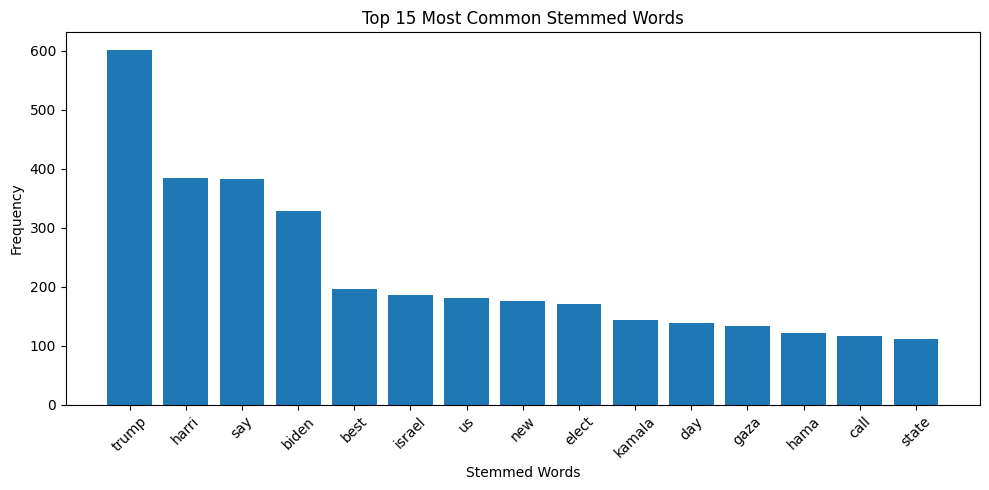

In [ ]:
# 📈 Word Frequency Distribution
# -----------------------------
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

all_words_stem = ' '.join(df_stem['stemmed']).split()
word_freq_stem = Counter(all_words_stem)
top_words_stem = word_freq_stem.most_common(15)

# Plot top 15 stemmed words
words_stem, freqs_stem = zip(*top_words_stem)
plt.figure(figsize=(10, 5))
plt.bar(words_stem, freqs_stem)
plt.title('Top 15 Most Common Stemmed Words')
plt.xlabel('Stemmed Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

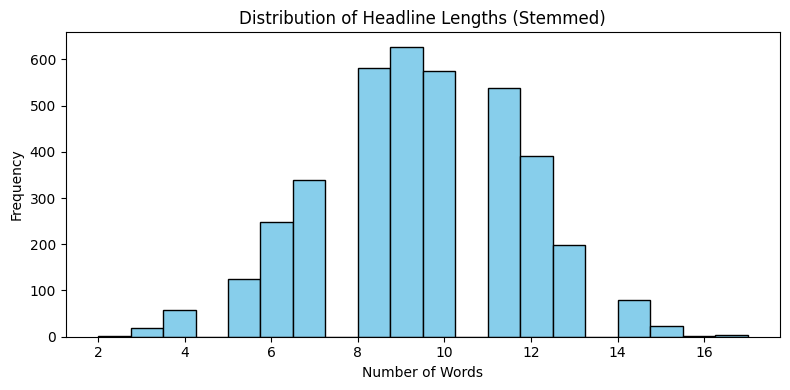

In [ ]:
plt.figure(figsize=(8, 4))
df_stem['word_count'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Headline Lengths (Stemmed)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(False)
plt.tight_layout()
plt.show()


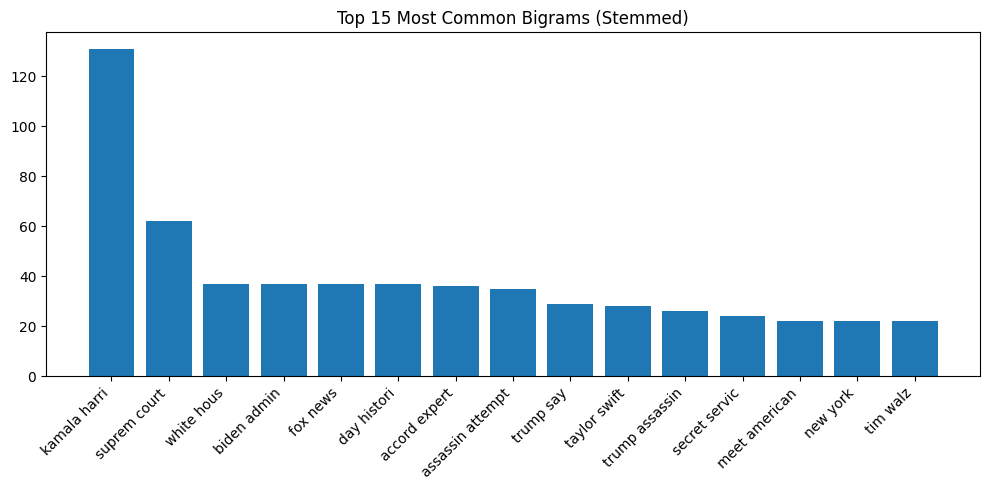

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Extract bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X_bigrams = vectorizer.fit_transform(df_stem['stemmed'])

# Sum up bigram frequencies
sum_bigrams = X_bigrams.sum(axis=0)
bigram_freq = [(word, sum_bigrams[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
bigram_freq = sorted(bigram_freq, key=lambda x: x[1], reverse=True)[:15]

# Plot top bigrams
bigram_labels, bigram_counts = zip(*bigram_freq)
plt.figure(figsize=(10, 5))
plt.bar(bigram_labels, bigram_counts)
plt.xticks(rotation=45, ha='right')
plt.title("Top 15 Most Common Bigrams (Stemmed)")
plt.tight_layout()
plt.show()


In [ ]:
df_stem.to_csv('new_normalized_headlines.csv', index=False)